# Run the simple wave model

In this tutorial we will use the geometric eigenmodes and eigenvalues to simulate cortical activity, using a simple wave model inspired by neural field theory. Here, the spatiotemporal evolution of activity $\phi(\vec r,t)$ is described by an isotropic damped wave equation without regeneration,

$$
\displaystyle [\frac{1}{\gamma_s^2}\frac{\partial^2}{\partial t^2}+\frac{2}{\gamma_s}\frac{\partial}{\partial t}+1-r_s^2\nabla^2]\phi(\vec r,t)=Q(\vec r,t),
$$

where:
- $\gamma_s$ denotes the temporal damping parameter
- $r_s$ denotes the spatial length scale parameter
- $\nabla^2$ denotes the Laplace-Beltrami operator
- $Q(\vec r,t)$ denotes an external input

As in the previous tutorial, we begin by initialising the EigenSolver with a cortical surface and then solving for the eigenmodes and eigenvalues.

In [1]:
from nsbtools.io import load_data
from nsbtools.eigen import EigenSolver
from nsbtools.waves import simulate_waves
from nsbtools.utils import unmask
from nsbtools.plotting import plot_surf
from importlib.resources import files

lh_surf = load_data('surf', species='human', template='fsLR', density='32k', hemi='L')
medmask = load_data('medmask', species='human', template='fsLR', density='32k', hemi='L')

solver = EigenSolver(lh_surf, mask=medmask, n_modes=200)
solver.solve()

We can then call the `simulate_waves` function from the `waves` module, providing eigenmodes, eigenvalues, and the mass matrix as arguments:

In [2]:
sim_ts = simulate_waves(
    solver.emodes,
    solver.evals,
    mass=solver.mass,
    seed=1
)

Note that 1000 timepoints (`nt`) are simulated by default, with a timestep of 0.1 ms (`dt`).

To visualise activity, we can first sample a few timepoints from the output and add the medial wall back in:

In [3]:
sim_ts_sample = unmask(sim_ts[:, ::200], medmask)

Each timepoint of activity is then visualised in the plotter:

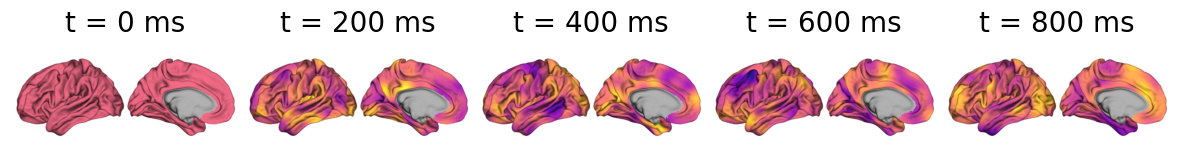

In [4]:
lh_surfpath = files('nsbtools.data') / 'sp-human_tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii'
plot_surf(
    lh_surfpath,
    sim_ts_sample,
    labels=[f't = {i*200} ms' for i in range(sim_ts_sample.shape[1])],
    cmap='plasma',
    color_range='group'
)